<a href="https://colab.research.google.com/github/modraqueeb/IndusVision/blob/main/Task7_MLIntern_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/107.7 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 226MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 57.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 248.9ms
Speed: 12.2ms preprocess, 248.9ms inference, 27.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


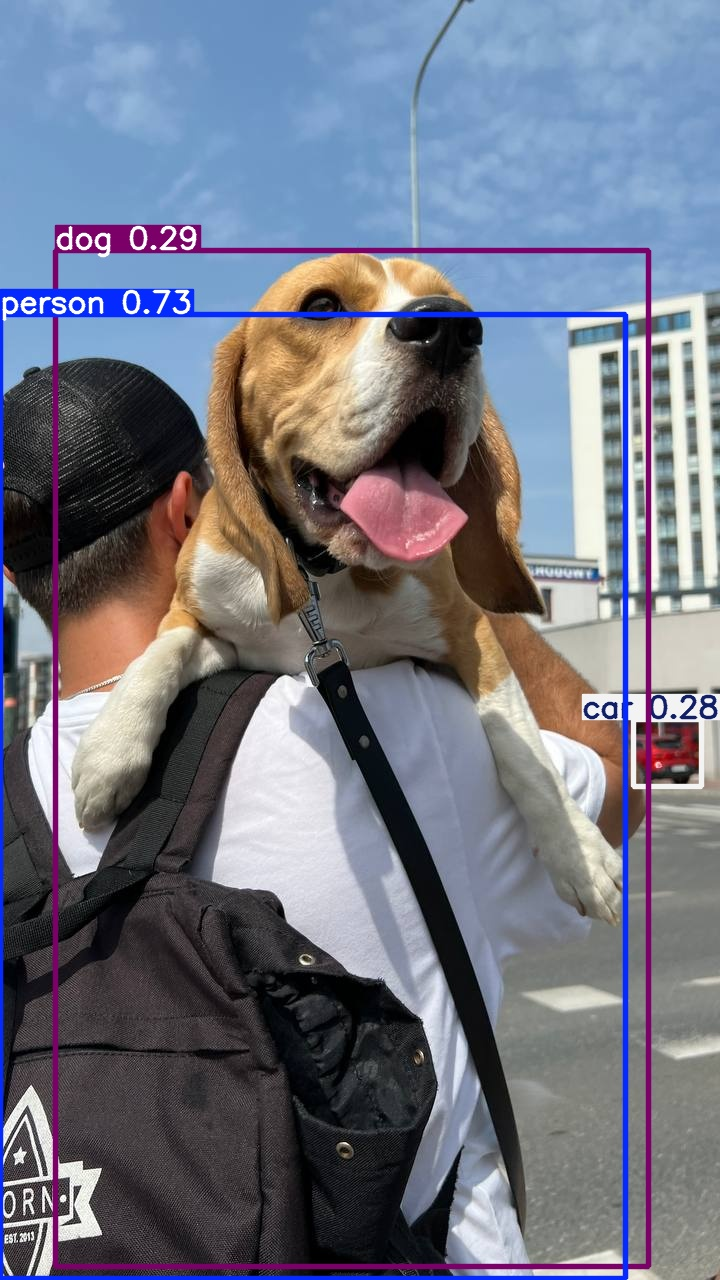

In [5]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Oy2ZLeWPJ0b4RSGKqYrp")
project = rf.workspace("me-wxkjy").project("my-first-project-78mid")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [2]:
import os
os.chdir(os.path.expanduser("~"))

from google.colab import files
uploaded = files.upload()


Saving My First Project.v2i.yolov5pytorch.zip to My First Project.v2i.yolov5pytorch.zip


In [5]:
%cd $HOME

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '$HOME'
/content
New https://pypi.org/project/ultralytics/8.3.92 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/My-First-Project-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, c

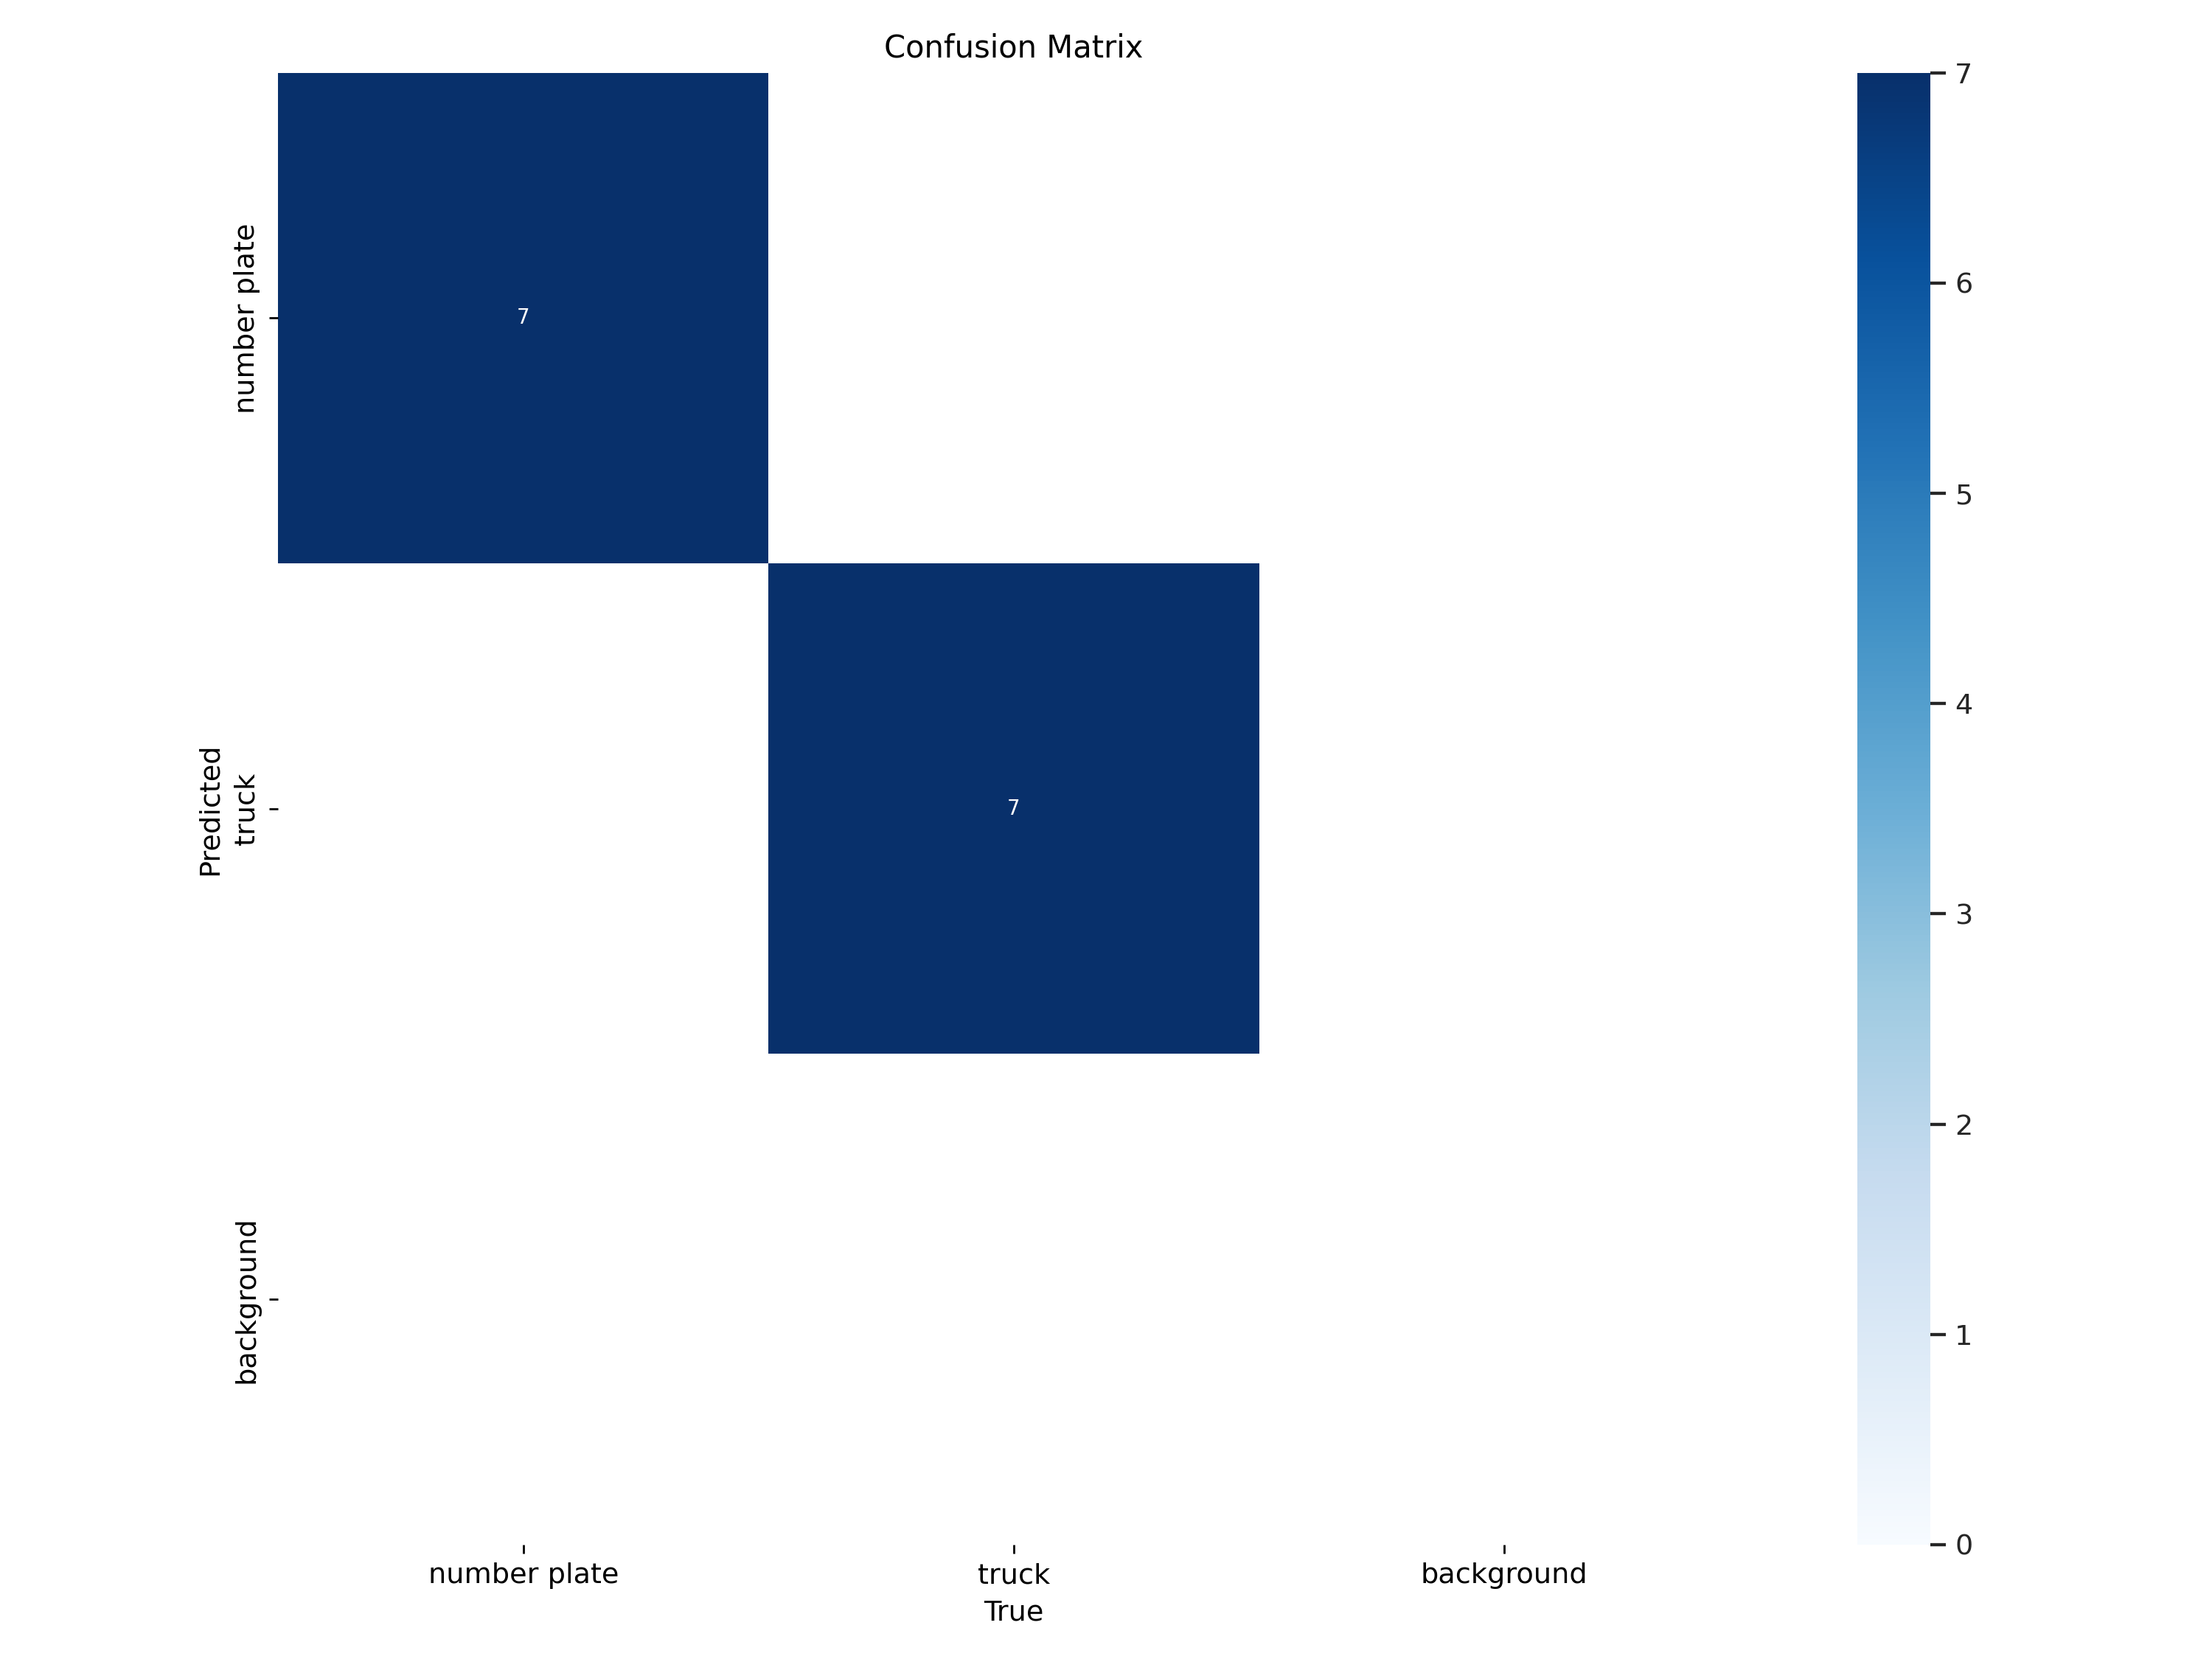

In [8]:
from IPython.display import Image

# Make sure the path is correct and points to the confusion matrix image
Image(filename=f'{os.path.expanduser("~")}/runs/detect/train3/confusion_matrix.png', width=600)


/content


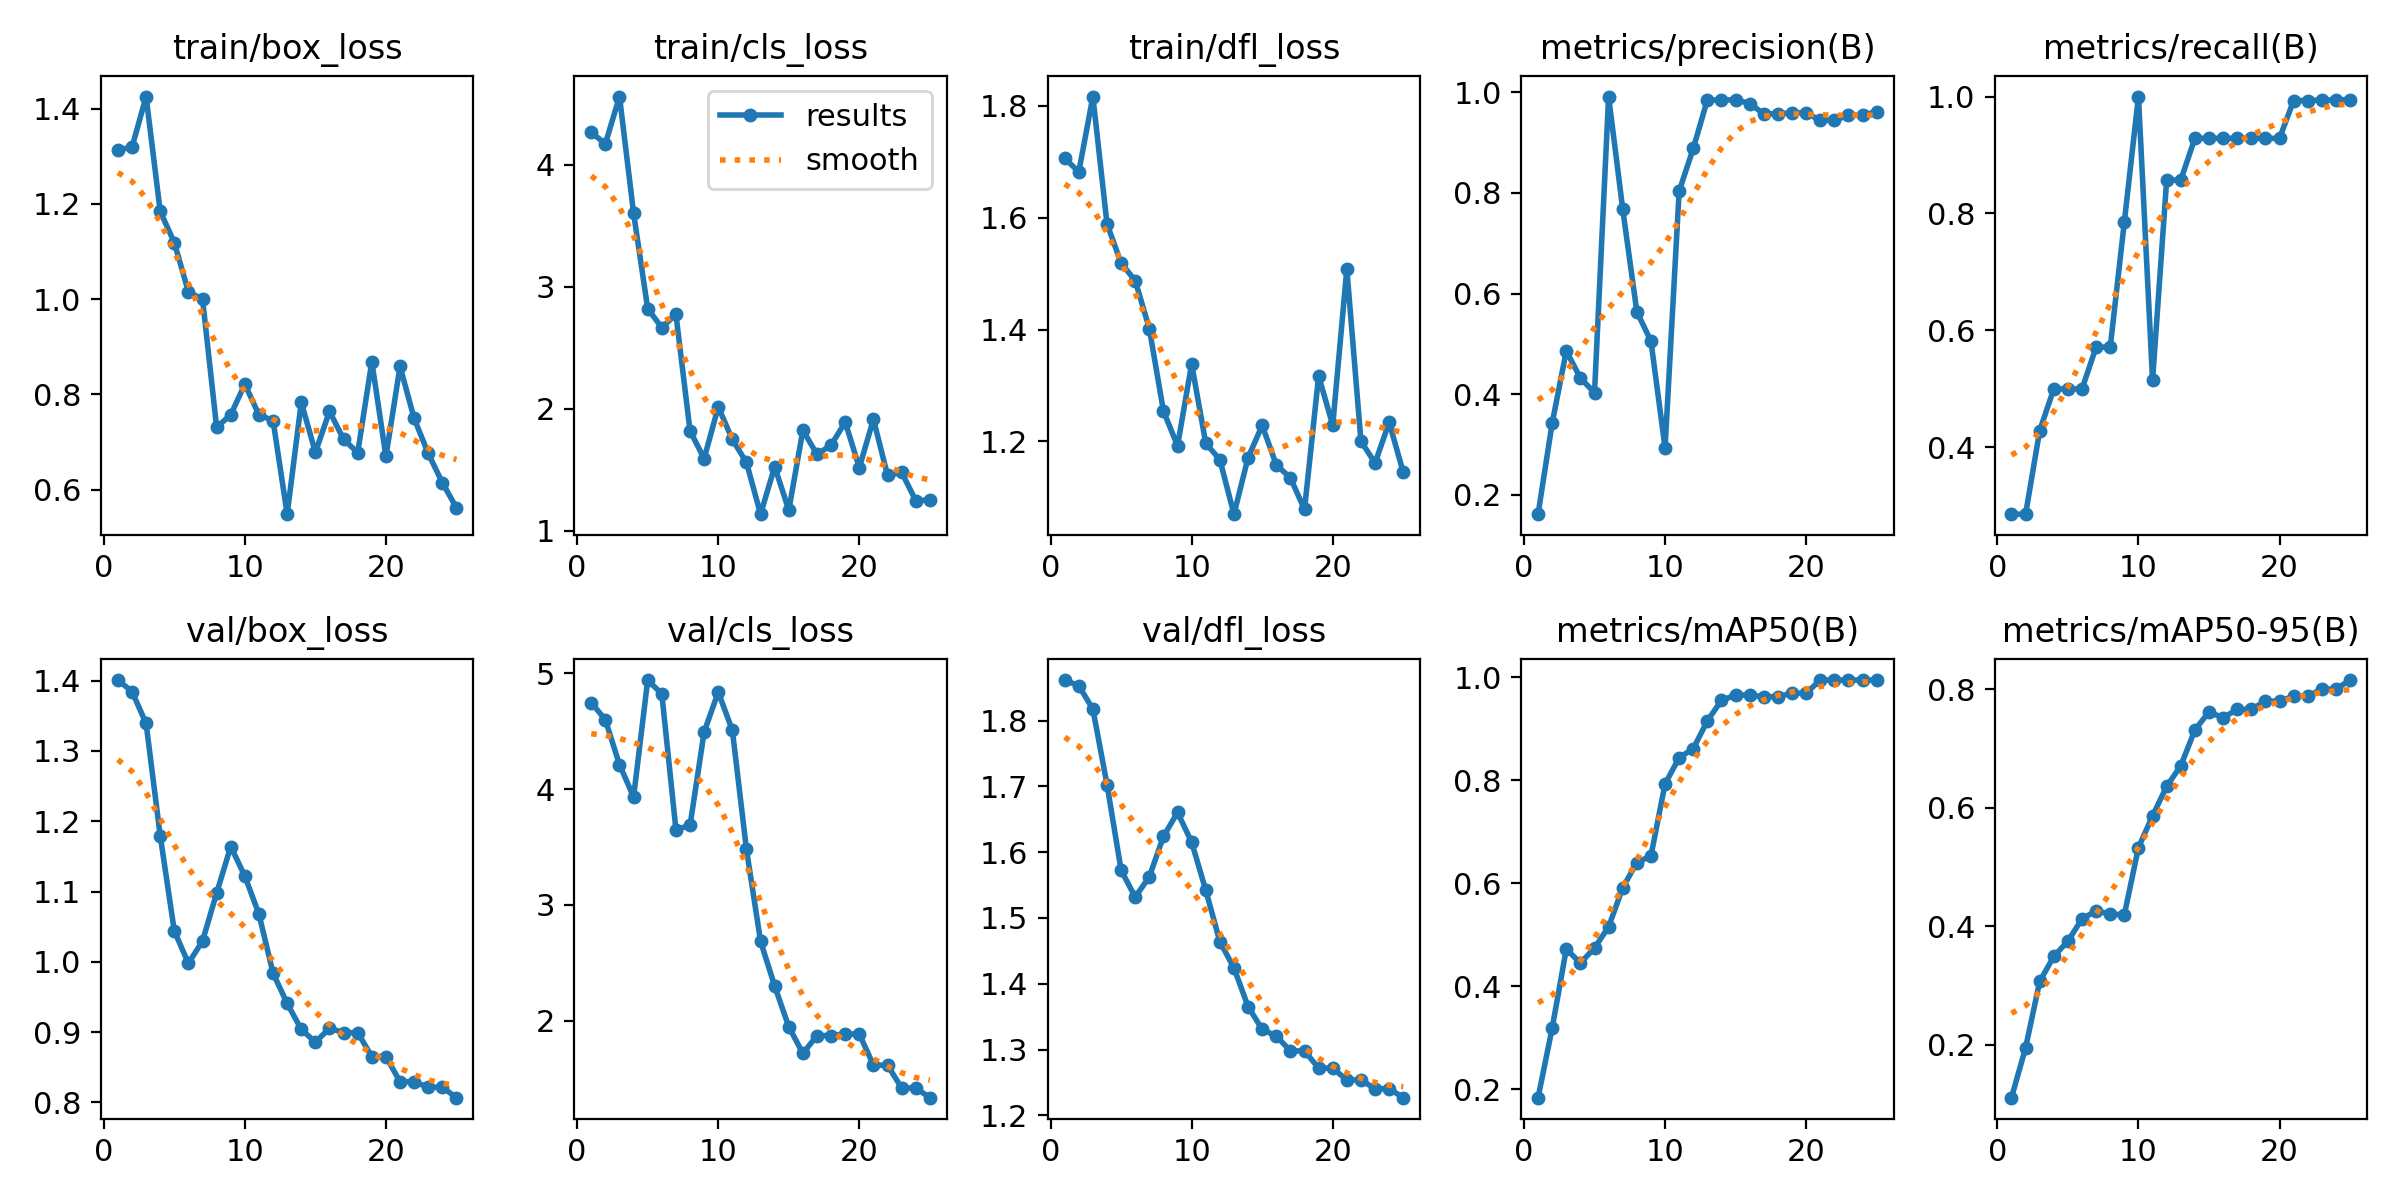

In [13]:
import os
from IPython.display import Image

# Get the home directory in Colab (which is usually '/content')
home_dir = os.path.expanduser("~")

# Change the directory to home
%cd {home_dir}

# Now use the correct path for the image file
image_path = f'{home_dir}/runs/detect/train3/results.png'
Image(filename=image_path, width=600)


/content


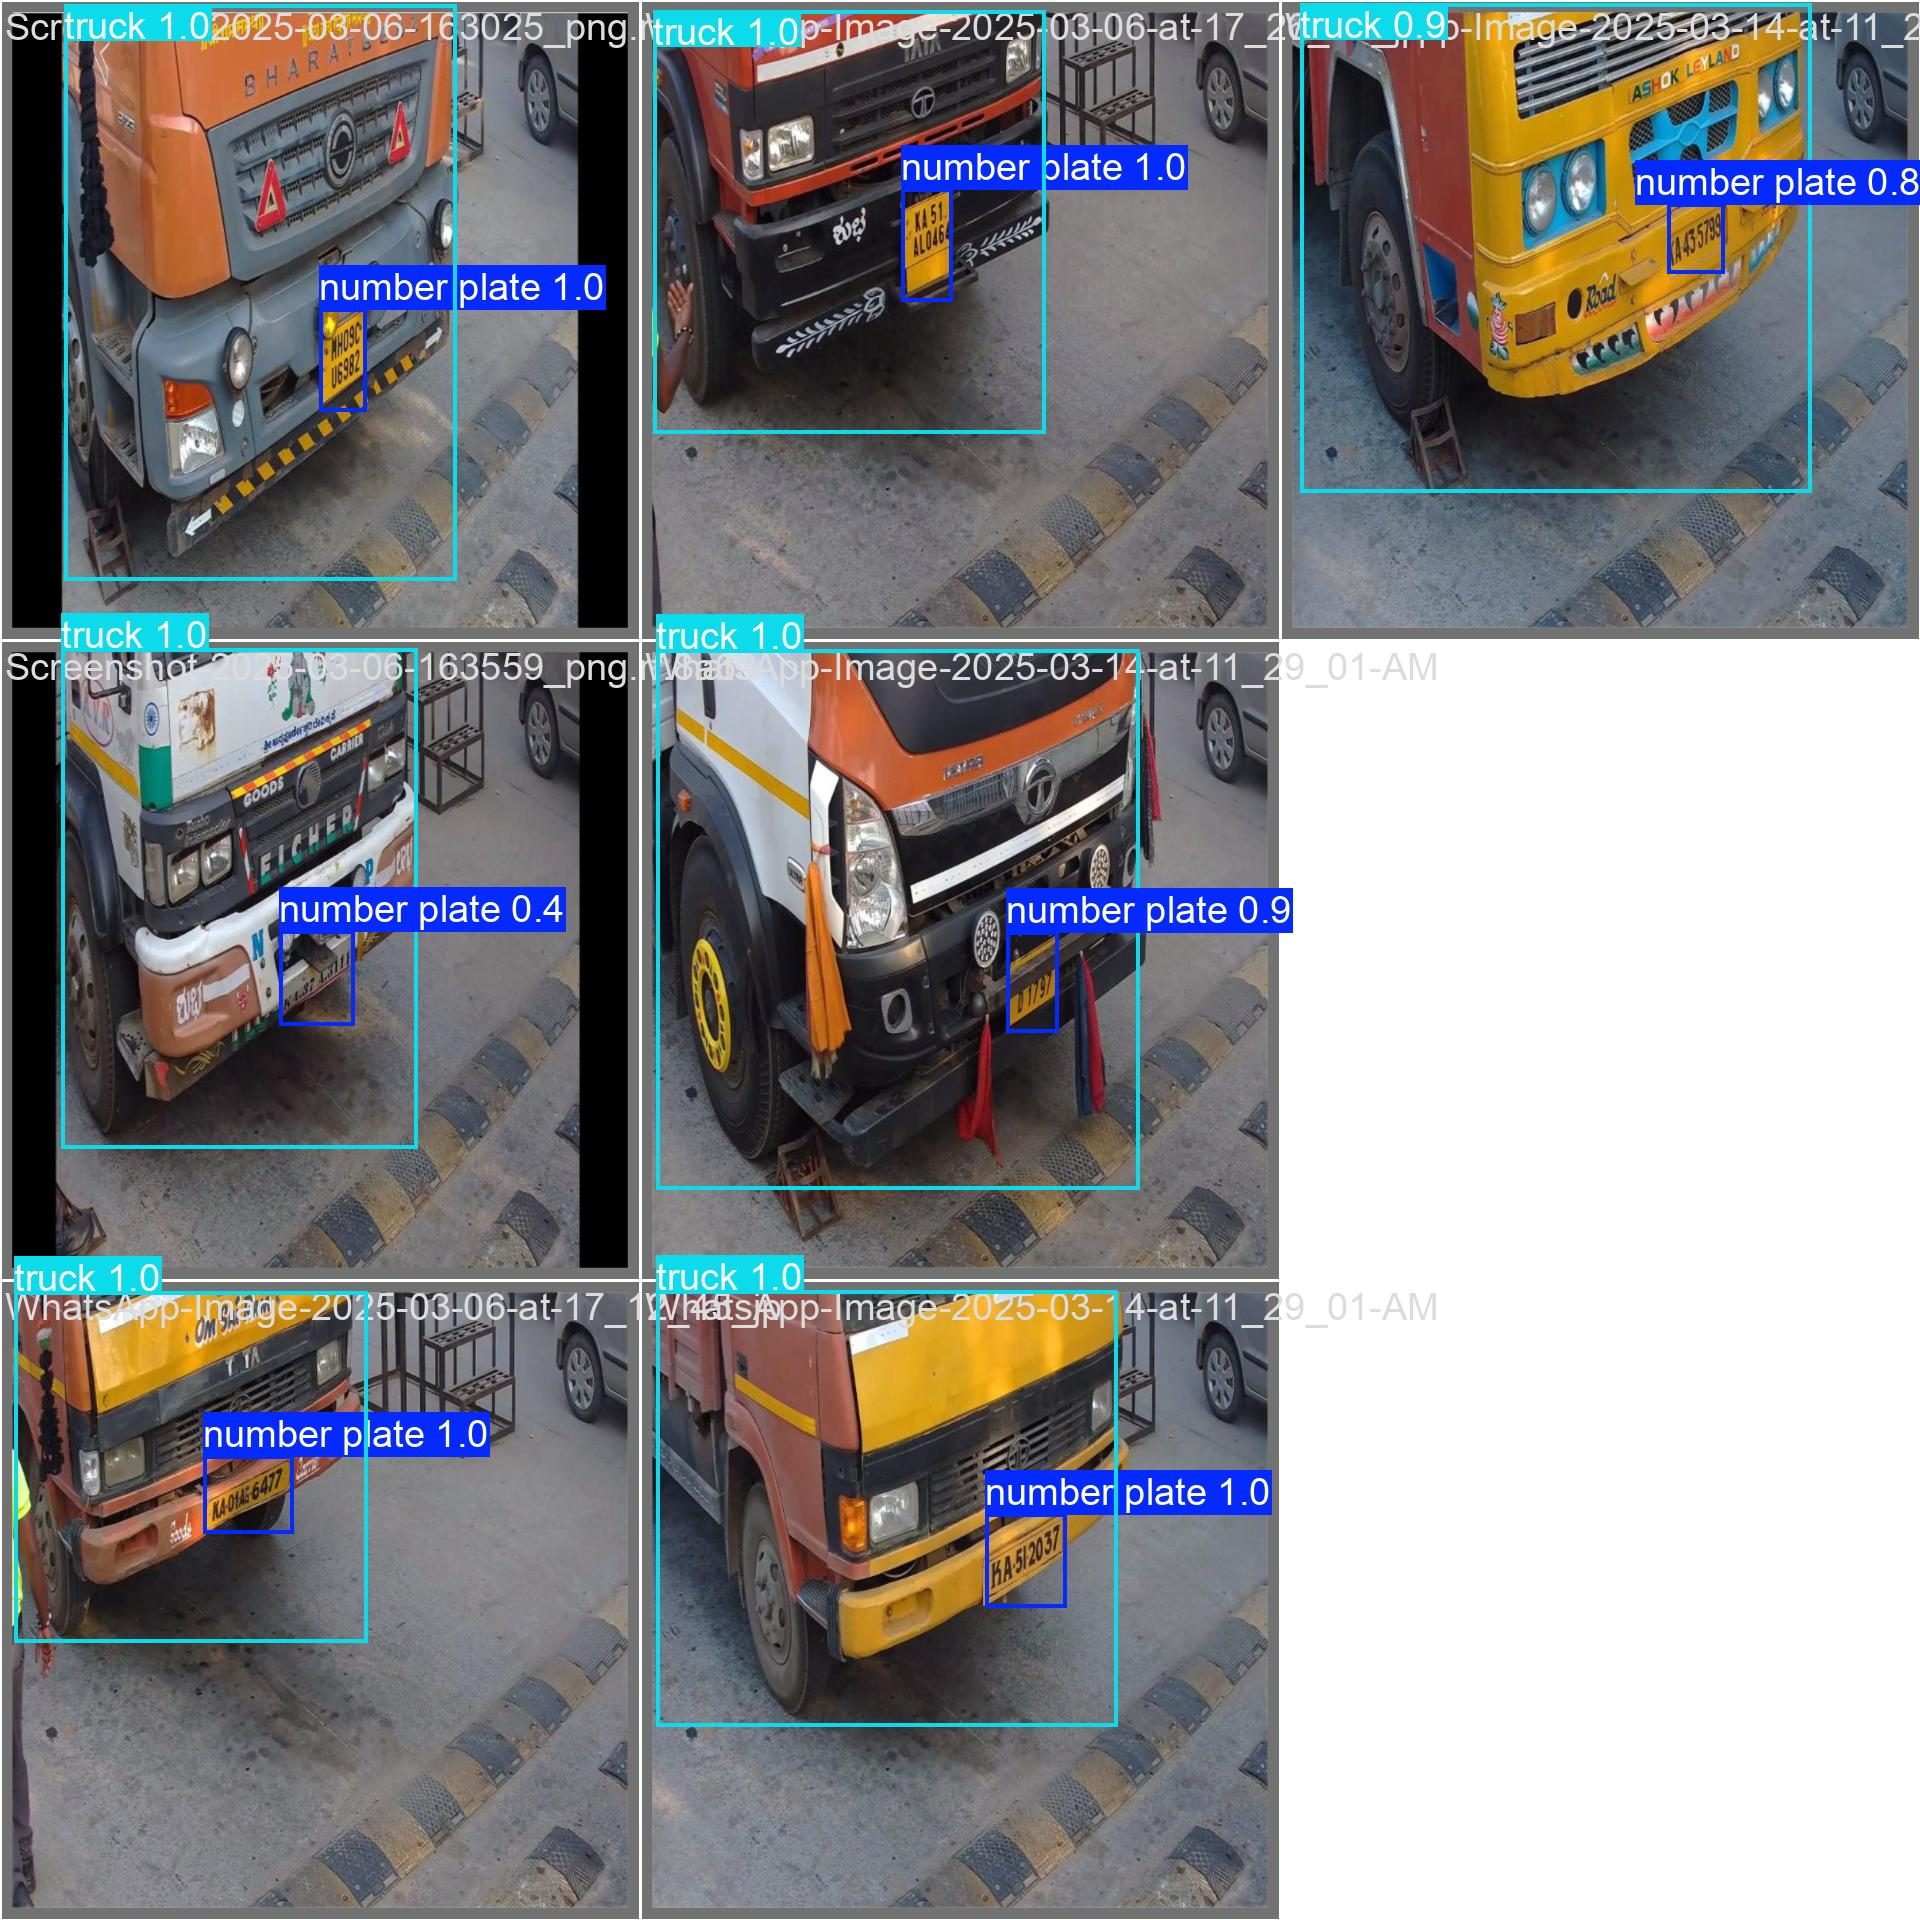

In [17]:
import os
from IPython.display import Image

# Get the home directory (Colab's home is usually /content)
home_dir = os.path.expanduser("~")

# If you want to change the working directory to home
%cd {home_dir}

# Now load the image correctly
image_path = f'{home_dir}/runs/detect/train3/val_batch0_pred.jpg'
Image(filename=image_path, width=600)
